In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Important libraries
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
# from keras.layers.convolutional import Conv2D  #OLD
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
# from keras.utils import np_utils   #OLD
from keras.utils import to_categorical
from keras import backend as K


In [6]:
# Sample Code Learning: # one hot encode
y_train = np.array([4, 0, 3, 2])
print(y_train)
print('y_train.shape:',y_train.shape)
# Y_train = np_utils.to_categorical(y_train)  #OLD
Y_train = to_categorical(y_train)
print(Y_train)
Y_train.shape
print('Y_train.shape:',Y_train.shape)

[4 0 3 2]
y_train.shape: (4,)
[[0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]
Y_train.shape: (4, 5)


Example from the MNIST database

In [7]:
import keras
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()



# Resizing x_train
x_train_resized = []
for img in x_train:
    resized_img = cv.resize(img, (7,7), interpolation = cv.INTER_AREA)
    x_train_resized.append(resized_img)
x_train_resized = np.array(x_train_resized)
x_train = x_train_resized

# Resizing x_test
x_test_resized = []
for img in x_test:
    resized_img = cv.resize(img, (7,7), interpolation = cv.INTER_AREA)
    x_test_resized.append(resized_img)
x_test_resized = np.array(x_test_resized)
x_test = x_test_resized
# Checking the new shape of x_train and x_test
print('Resized x_train shape:', x_train_resized.shape)
print('Resized x_test shape:', x_test_resized.shape)


######


print('x_train.shape:',x_train.shape)
print('y_train.shape:',y_train.shape)
print('x_test.shape:',x_test.shape)
print('y_test.shape:',y_test.shape)

aa=x_train[0]
print('hi')
print('shape of x_train[0]:',aa.shape)

print('x_train[0]:')
print(x_train[0]) # To show the first image of (7,7) in x_train
print('y_train[0:4]:') # To show 4 labels in y_train
y_train[0:4]



Resized x_train shape: (60000, 7, 7)
Resized x_test shape: (10000, 7, 7)
x_train.shape: (60000, 7, 7)
y_train.shape: (60000,)
x_test.shape: (10000, 7, 7)
y_test.shape: (10000,)
hi
shape of x_train[0]: (7, 7)
x_train[0]:
[[  0   0   0   0   0   0   0]
 [  0   3  82 125 128 108   0]
 [  0   1 118 134  43   0   0]
 [  0   0   1 124  74   0   0]
 [  0   0   0  54 211   4   0]
 [  0  56 167 164  38   0   0]
 [  0  56  31   0   0   0   0]]
y_train[0:4]:


array([5, 0, 4, 1], dtype=uint8)

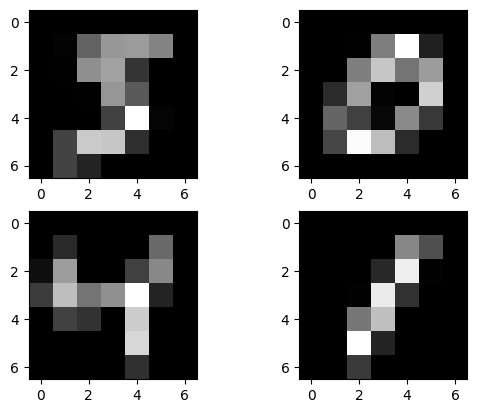

In [8]:
plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

x_train shape: (60000, 7, 7)
60000 train samples
10000 test samples
x_train[0]:
[[0.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.01176471 0.32156864 0.49019608 0.5019608  0.42352942
  0.        ]
 [0.         0.00392157 0.4627451  0.5254902  0.16862746 0.
  0.        ]
 [0.         0.         0.00392157 0.4862745  0.2901961  0.
  0.        ]
 [0.         0.         0.         0.21176471 0.827451   0.01568628
  0.        ]
 [0.         0.21960784 0.654902   0.6431373  0.14901961 0.
  0.        ]
 [0.         0.21960784 0.12156863 0.         0.         0.
  0.        ]]


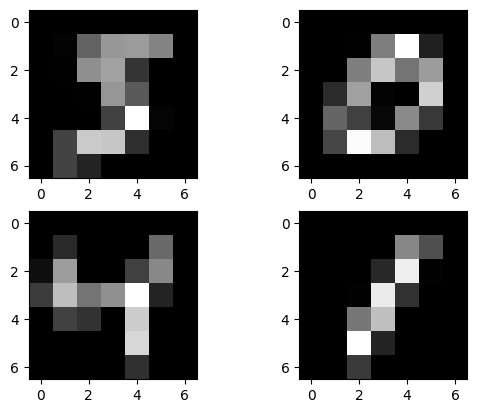

In [9]:
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train/= 255
x_test/= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples') #60000 train samples
print(x_test.shape[0], 'test samples') #10000 test samples
print('x_train[0]:')
print(x_train[0]) # To show the first image of (28,28) in x_train

plt.subplot(221)
plt.imshow(x_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
# show the plot, auto-scaled to show the same images
plt.show()


In [10]:
# Artificial Neural Network for MNIST

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)


x_train_resized = []
for img in x_train:
    resized_img = cv.resize(img, (7,7), interpolation = cv.INTER_AREA)
    x_train_resized.append(resized_img)
x_train_resized = np.array(x_train_resized)
x_train = x_train_resized

# Resizing x_test
x_test_resized = []
for img in x_test:
    resized_img = cv.resize(img, (7,7), interpolation = cv.INTER_AREA)
    x_test_resized.append(resized_img)
x_test_resized = np.array(x_test_resized)
x_test = x_test_resized


# reshape to be [samples][pixels][width][height]
X_train = x_train.reshape(x_train.shape[0], 1, 7, 7).astype('float32')
X_test = x_test.reshape(x_test.shape[0], 1, 7, 7).astype('float32')
print('X_train.shape:',X_train.shape)
print('X_test.shape:',X_test.shape)
print('original label')
print(y_train)
print('y_train.shape:',y_train.shape)

# labels are changed a one_hot representation.
Y_train = to_categorical(y_train)
print('new label')
print(Y_train)
Y_train.shape
print('Y_train.shape:',Y_train.shape)

Y_test = to_categorical(y_test)
num_classes = Y_test.shape[1]


X_train.shape: (60000, 1, 7, 7)
X_test.shape: (10000, 1, 7, 7)
original label
[5 0 4 ... 5 6 8]
y_train.shape: (60000,)
new label
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Y_train.shape: (60000, 10)


X_train.shape before reshape (60000, 7, 7)
here
49
here
X_train.shape after reshape (60000, 49)
Epoch 1/25
300/300 - 9s - loss: 1.9685 - accuracy: 0.3007 - val_loss: 1.4182 - val_accuracy: 0.4614 - 9s/epoch - 30ms/step
Epoch 2/25
300/300 - 1s - loss: 1.1653 - accuracy: 0.6057 - val_loss: 0.9587 - val_accuracy: 0.6800 - 1s/epoch - 4ms/step
Epoch 3/25
300/300 - 1s - loss: 0.8789 - accuracy: 0.6998 - val_loss: 0.8249 - val_accuracy: 0.7215 - 1s/epoch - 4ms/step
Epoch 4/25
300/300 - 1s - loss: 0.7983 - accuracy: 0.7262 - val_loss: 0.7636 - val_accuracy: 0.7486 - 1s/epoch - 4ms/step
Epoch 5/25
300/300 - 1s - loss: 0.7492 - accuracy: 0.7491 - val_loss: 0.7367 - val_accuracy: 0.7696 - 1s/epoch - 5ms/step
Epoch 6/25
300/300 - 1s - loss: 0.6975 - accuracy: 0.7724 - val_loss: 0.6573 - val_accuracy: 0.7868 - 999ms/epoch - 3ms/step
Epoch 7/25
300/300 - 1s - loss: 0.6448 - accuracy: 0.7941 - val_loss: 0.6066 - val_accuracy: 0.8079 - 799ms/epoch - 3ms/step
Epoch 8/25
300/300 - 1s - loss: 0.5904 - ac

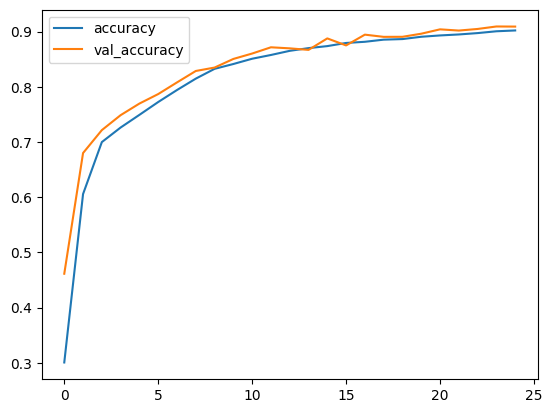

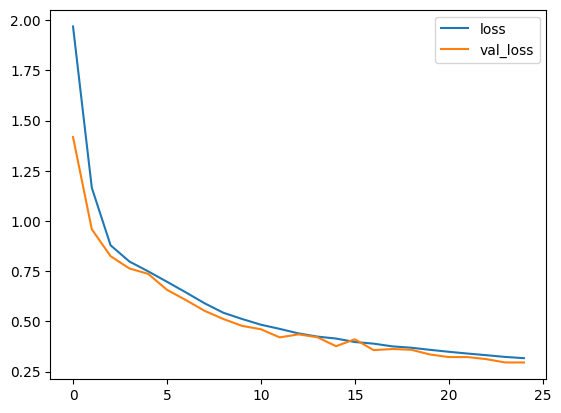

In [11]:
# EXAMPLE 1:
# ANN example based on 784 (28x28) change to 49 (7*7)inputs, 1D input
#
from keras.datasets import mnist

# load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
#
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()



x_train_resized = []
for img in x_train:
    resized_img = cv.resize(img, (7,7), interpolation = cv.INTER_AREA)
    x_train_resized.append(resized_img)
x_train_resized = np.array(x_train_resized)
X_train = x_train_resized

# Resizing x_test
x_test_resized = []
for img in x_test:
    resized_img = cv.resize(img, (7,7), interpolation = cv.INTER_AREA)
    x_test_resized.append(resized_img)
x_test_resized = np.array(x_test_resized)
X_test = x_test_resized


#
# flatten 28*28 images to a 784 vector for each image
print('X_train.shape before reshape' , X_train.shape)
num_pixels = X_train.shape[1] * X_train.shape[2]
print('here')
print(num_pixels)
print('here')

X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

print('X_train.shape after reshape' , X_train.shape)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
num_hidden_nodes = 650

# define baseline model
# Dense : a regular fully connected layer
# The chosen complie model has a loss function, and the purpose is to compute the quantity that
# the model should minimize during training.  Below, the 'categorical_crossentropy' is used as
# the loss function. (The MSE is not chosen to be the loss function.) It would compute the crossentropy
# loss between the labels and predictions. There are two or more label classes, usually with labels
# provided in a one_hot representation.

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_hidden_nodes, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Choice of optimizer: adam (adaptive moment estimation), AdaGrad (adaptive learning rate),
    # sgd (Stochastic gradient descent), RMSprop (similar to AdaGrad), Adadelta (adaptive delta) ...
    return model
# build the model
model = baseline_model()
# Fit the model
# verbose : number of steps before showing a result
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))
#
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [ ]:
# EXAMPLE 2:
# The example based on a simple CNN structure, 2D input
#
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28,1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
#
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)

# Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))
#

Epoch 1/10
300/300 - 8s - loss: 0.2433 - accuracy: 0.9294 - val_loss: 0.0749 - val_accuracy: 0.9780 - 8s/epoch - 26ms/step
Epoch 2/10
300/300 - 1s - loss: 0.0745 - accuracy: 0.9772 - val_loss: 0.0544 - val_accuracy: 0.9821 - 1s/epoch - 4ms/step
Epoch 3/10
300/300 - 1s - loss: 0.0514 - accuracy: 0.9845 - val_loss: 0.0432 - val_accuracy: 0.9863 - 1s/epoch - 4ms/step
Epoch 4/10
300/300 - 1s - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.0392 - val_accuracy: 0.9868 - 1s/epoch - 4ms/step
Epoch 5/10
300/300 - 1s - loss: 0.0325 - accuracy: 0.9897 - val_loss: 0.0324 - val_accuracy: 0.9889 - 1s/epoch - 4ms/step
Epoch 6/10
300/300 - 1s - loss: 0.0276 - accuracy: 0.9908 - val_loss: 0.0356 - val_accuracy: 0.9877 - 1s/epoch - 4ms/step
Epoch 7/10
300/300 - 1s - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.0340 - val_accuracy: 0.9888 - 1s/epoch - 4ms/step
Epoch 8/10
300/300 - 1s - loss: 0.0184 - accuracy: 0.9943 - val_loss: 0.0381 - val_accuracy: 0.9889 - 1s/epoch - 4ms/step
Epoch 9/10
300/300 - 1s

In [ ]:
# EXAMPLE 3:
# The example based on another simple CNN structure, 2D input
#
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

seed = 7
np.random.seed(seed)
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train =  to_categorical(y_train)
y_test =  to_categorical(y_test)
num_classes = y_test.shape[1]
#

def baseline_model():
	# create model
	model = Sequential()
	model.add(Conv2D(64, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
	model.add(MaxPooling2D(pool_size=(2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dropout(0.5))
	model.add(Dense(num_classes, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

model = baseline_model()
# Fit the model
history = model.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("CNN Error: %.2f%%" % (100-scores[1]*100))


Epoch 1/10
300/300 - 4s - loss: 0.4312 - accuracy: 0.8637 - val_loss: 0.0790 - val_accuracy: 0.9745 - 4s/epoch - 13ms/step
Epoch 2/10
300/300 - 2s - loss: 0.1349 - accuracy: 0.9595 - val_loss: 0.0513 - val_accuracy: 0.9830 - 2s/epoch - 6ms/step
Epoch 3/10
300/300 - 2s - loss: 0.1018 - accuracy: 0.9691 - val_loss: 0.0396 - val_accuracy: 0.9869 - 2s/epoch - 6ms/step
Epoch 4/10
300/300 - 2s - loss: 0.0830 - accuracy: 0.9754 - val_loss: 0.0338 - val_accuracy: 0.9888 - 2s/epoch - 6ms/step
Epoch 5/10
300/300 - 2s - loss: 0.0702 - accuracy: 0.9787 - val_loss: 0.0314 - val_accuracy: 0.9893 - 2s/epoch - 7ms/step
Epoch 6/10
300/300 - 2s - loss: 0.0632 - accuracy: 0.9809 - val_loss: 0.0303 - val_accuracy: 0.9900 - 2s/epoch - 8ms/step
Epoch 7/10
300/300 - 2s - loss: 0.0585 - accuracy: 0.9818 - val_loss: 0.0260 - val_accuracy: 0.9913 - 2s/epoch - 7ms/step
Epoch 8/10
300/300 - 2s - loss: 0.0540 - accuracy: 0.9833 - val_loss: 0.0245 - val_accuracy: 0.9917 - 2s/epoch - 6ms/step
Epoch 9/10
300/300 - 2s

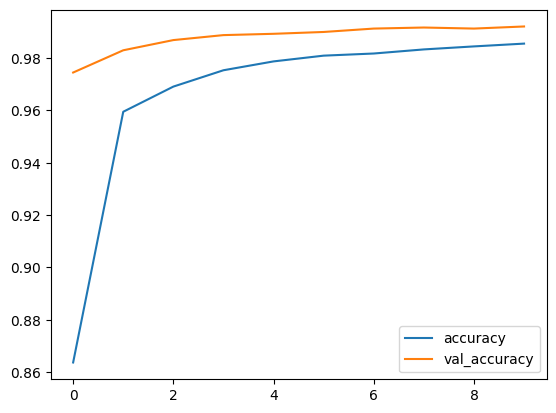

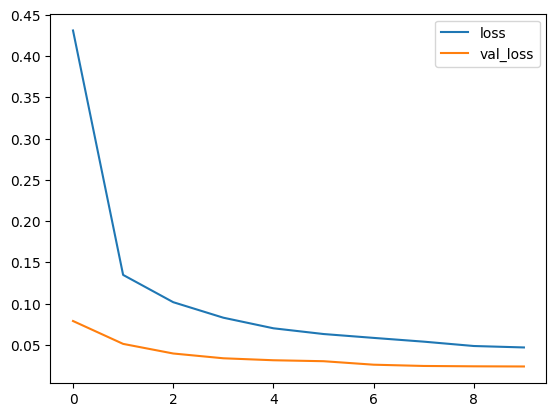

In [ ]:
metrics = history.history
plt.plot(history.epoch, metrics['accuracy'], metrics['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

plt.plot(history.epoch, metrics['loss'], metrics['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()


END OF FILE